# Metaclasses

### Meaning of meta
```
google dictionary: referring to itself or to the conventions of its genre; self-referential

merriam dictionary: concerning or providing information about members of its own category
```

### Metaprogramming

Just like metadata is data about data, metaprogramming is writing programs that manipulate programs.

```
Metaprogramming is a programming technique in which computer programs have the ability to treat other programs as their data. 

It means that a program can be designed to read, generate, analyze or transform other programs, and even modify itself while running.
```

### Metaclasses in Python:

* Metaclasses are a way to do metaprogramming in Python.
* metaclass is a class whose instances are classes
* classes for classes (hence “meta” in their name).

### Introduction

If you've been programming in Python for a while, you might know that everything is an object, and classes create objects/instances.

But if everything is an object (and classes are also objects), who creates those classes? This is what we will discuss.

In most languages, classes are just pieces of code that describe how to produce an object. 

That's kinda true in Python too:

In [1]:
class ObjectCreator(object):
    pass

my_object = ObjectCreator()
print(my_object)

But classes are more than that in Python. Classes are objects too.

Yes, objects.

As soon as you use the keyword class, Python executes it and creates an object. The instruction

```python
>>> class ObjectCreator(object):
...       pass
...
```

creates in memory an object with the name ObjectCreator.

This object (the class) is itself capable of creating objects (the instances), and this is why it's a class.

But still, it's an object, and therefore:

* you can assign it to a variable
* you can copy it
* you can add attributes to it
* you can pass it as a function parameter

```python
>>> class A:
...     x = 4
...
>>> A
<class '__main__.A'>

>>> a = A()
>>> a.x
4

>>> B = A  # you can assign a class to a variable
>>> B
<class '__main__.A'>

>>> c = B()
>>> c.x
4

>>> A.y = 5  # you can add attributes to a class
>>> a.y
5
>>> c.y
5

>>> def f(some_class):
...     d = some_class()
...     print(d)
...
>>> f(A)  # you can pass a class as a parameter
<__main__.A object at 0x7fb52014eaf0>
```

Classes are objects as well. As a result, a class must have a type. What is the type of a class?

An object’s type determines the **operations that the object supports** (e.g., “does it have a length?”) and also defines the **possible values for objects** of that type.
* Capabilities of data (E.g: Ints can be added 12 + 12 = 24)
* Constraints of data (E.g: We cannot add int and str together)
* Meaning of data (E.g: datetime actually gives the representation of point in time)

```python
>>> class Foo:
...     pass
...
>>> x = Foo()

>>> type(x)
<class '__main__.Foo'>

>>> type(Foo)
<class 'type'>

>>> type(type)
<class 'type'>
```

```python
>>> type(type)
<class 'type'>
```

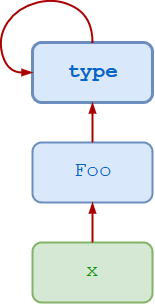

```python
>>> print(type(1))
<class 'int'>

>>> print(type("1"))
<class 'str'>

>>> def func():
...     pass
...
>>> type(func)
<class 'function'>

>>> for t in int, float, dict, list, tuple:
...     print(type(t))
...
<class 'type'>
<class 'type'>
<class 'type'>
<class 'type'>
<class 'type'>
```

This creation of the class object is controlled by a special kind of object
called a metaclass.

type is a metaclass, of which classes are instances.

All classes in Python by default have type as a metaclass.

```python
class type(object)
 |  type(object_or_name, bases, dict)
 |  type(object) -> the object's type
 |  type(name, bases, dict) -> a new type
```

```python
class Car:
    def __init__(self, color):
        self._color = color
    
    def drive(self):
        print("You are driving a car")
        
my_car = Car('red')
```

```python
>>> my_car
<__main__.Car object at 0x7fb52014eb50>
```

Inside the instance: All the attributes are stored inside a dictionary

```python
>>> my_car.__dict__
{'_color': 'red'}
```

Where is **drive** method? Instance maintains a reference to it's class

```python
>>> my_car.__class__
<class '__main__.Car'>
```

```python
>>> my_car.__class__.__dict__
mappingproxy({
    '__module__': '__main__', 
    '__init__': <function Car.__init__ at 0x7fb5081a3c10>, 
    'drive': <function Car.drive at 0x7fb5000e6dc0>, 
    '__dict__': <attribute '__dict__' of 'Car' objects>, 
    '__weakref__': <attribute '__weakref__' of 'Car' objects>, 
    '__doc__': None})
```

A mappingproxy is simply a dict with no `__setattr__` method(prevent direct dictionary updates). This helps python speed up simple attribute lookups for classes.

```python
class Car:
    def __init__(self, color):
        self._color = color
    
    def drive(self):
        print("You are driving a car")
```

### Defining a Class Dynamically

```python
type(name, bases, attributes) 
```

```python
def drive(self):
    print("You are driving a car")
    
def init(self, color):
    self._color = color
    
attrs = {'__init__': init, 'drive': drive}
superclasses = (object, )

Car = type("Car", superclasses, attrs)
```

This is what Python does when you use the keyword class, and it does so by using a metaclass.

### What are metaclasses?

Metaclasses are the 'stuff' that creates classes.

You define classes in order to create objects, right?

But we learned that Python classes are objects.

Well, metaclasses are what create these objects.


Simply stated, a metaclass is an object that knows how to create and
manage classes

type is the built-in metaclass Python uses, but of course, you can create your own metaclass.

All classes in Python by default have type as a metaclass.

In Python 2, you can add a `__metaclass__` attribute when you write a class.

In Python3, we use `metaclass` keyword.

```python
class Foo:                   # In Python 3, use the syntax
    __metaclass__ = type     # class Foo(metaclass=type)
    ...
```

```python
class Foo(object):
    __metaclass__ = something...
    [...]
```

If you do so, Python will use the metaclass to create the class `Foo`.

Careful, it's tricky.

You write class `Foo(object)` first, but the class object Foo is not created in memory yet.

Python will look for `__metaclass__` in the class definition. If it finds it, it will use it to create the object class `Foo`. If it doesn't, it will use `type` to create the class.

Now the big question is, what can you put in `__metaclass__`?

The answer is something that can create a class.

And what can create a class? type, or anything that subclasses or uses it.

### Object Creation

The `__new__()` is a class method that is called to create an instance.

The `__init__()` method initializes the attributes of an object and is called immediately after an object has been newly created.

The `__new__()` and `__init__()` methods are used together to create and initialize
new instances.

When an object is created by calling `A(args)`, it is translated into the following steps:

```python
x = A.__new__(A,args)
if isinstance(x, A): x.__init__(args)
```

That `__call__()` method in turn invokes the following:

* `__new__()`
* `__init__()`

In user-defined objects, it is rare to define `__new__()`, it is usually only defined in metaclasses or in user-defined objects that happen to inherit from one of the immutable types(int, str, tuples, and so on).

### Uses for metaclasses

The primary use of metaclasses is in frameworks that want to assert more control
over the definition of user-defined objects.

You can use metaclasses to enforce different guidelines on the attributes, methods, and their values.
* Domain restriction of values
* Implicit conversion of values to custom classes (you might want to hide all of these complexities from users writing the class)
* Enforcing different naming conventions and style guidelines (like "every method should have a docstring")
* Adding new attributes to a class

The main reason to use metaclasses over having all of this logic defined in the class definitions itself is to avoid the code repetition throughout the codebase.


Real world uses of metaclasses
* Abstract base classes
* Registration of classes
* Creating APIs in libraries and frameworks

When a custom metaclass is defined, it typically inherits from type() and reimplements methods such as `__init__()` or `__new__()`.

```python
>>> class CustomMetaClass(type):
...     def __init__(cls, name, bases, attrs):
...             for name, value in attrs.items():
...                     print('{} :{}'.format(name, value))
```

```python
>>> class SomeClass(metaclass=CustomMetaClass):
...     class_attribute = "Some string"
...
__module__ :__main__
__qualname__ :SomeClass
class_attribute :Some string
```

Here is an example of a metaclass that forces all methods to have a
documentation string:

```python
class DocMeta(type):
    def __init__(self, name, bases, dict):
        for key, value in dict.items():
            # Skip special and private methods
            if key.startswith("__"): continue
                
            # Skip anything not callable
            if not hasattr(value, "__call__"): continue
            
            # Check for a doc-string
            if not getattr(value, "__doc__"):
                raise TypeError("%s must have a docstring" % key)
            
            type.__init__(self,name,bases,dict)
```

To use this metaclass, a class needs to explicitly select it. 

The most common technique for doing this is to first define a base class such as the following:

```python
class Documented:               # In Python 3, use the syntax
    __metaclass__ = DocMeta     # class Documented(metaclass=DocMeta)
```

```python
class Foo(Documented):
    def spam(self, a, b):
        "spam does something"
        pass
```

Say we want to use snake_case(after all, it's Python!) for class attributes and method. 

Can we write a metaclass to change all those camelCase attributes to snake_case?

```python
def camel_to_snake(name):
    """A function that converts camelCase to snake_case."""
    import re
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

class SnakeCaseMetaclass(type):
    def __new__(snakecase_metaclass, future_class_name,
                future_class_parents, future_class_attr):
        snakecase_attrs = {}
        for name, val in future_class_attr.items():
            snakecase_attrs[camel_to_snake(name)] = val
        return type(future_class_name, future_class_parents,
                    snakecase_attrs)
```

```python
>>> class SomeClass(metaclass=SnakeCaseMetaclass):
...     camelCaseVar = 5

>>> SomeClass.camelCaseVar
AttributeError: type object 'SomeClass' has no attribute 'camelCaseVar'

>>> SomeClass.camel_case_var
5
```

You might have wondered why we use `__new__` instead of `__init__` here.

* `__new__` is actually the first step in creating an instance. It is responsible for returning a new instance of your class.

* `__init__`, on the other hand, doesn't return anything. It's only responsible for initializing the instance after it's been created.

A simple rule of thumb to remember: Use `new` when you need to control the creation of a new instance; use `init` when you need to control the initialization of a new instance.

### Registration of classes

```python
handlers = {}

class CustomMetaclass(type):
    def __new__(meta, name, bases, attrs):
        cls = type.__new__(meta, name, bases, attrs)
        for ext in attrs["formats"]:
            handlers[ext] = cls
        return cls

class Handler(metaclass=CustomMetaclass):
    formats =  ()   #common stuff for all kinds of file format handlers

class ImageHandler(Handler):
    formats = "jpeg", "png"

class AudioHandler(Handler):
    formats = "mp3", "wav"
```

```python
>>> handlers
{
    'jpeg': <class '__main__.ImageHandler'>, 
    'png': <class '__main__.ImageHandler'>, 
    'mp3': <class '__main__.AudioHandler'>, 
    'wav': <class '__main__.AudioHandler'>
}
```

### Singleton class in Python

```python
class SingletonMeta(type):
    
    _instances = {}
    
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            instance = super().__call__(*args, **kwargs)
            cls._instances[cls] = instance
        return cls._instances[cls]
```

```python
class Singleton(metaclass=SingletonMeta):
    def some_business_logic(self):
        """
        Finally, any singleton should define some business logic, which can be
        executed on its instance.
        """
        # ...
```

```python
>>> s1 = Singleton()
>>> s2 = Singleton()
>>>
>>> id(s1) == id(s2)
True
```

Defining a custom `__call__()` method in the metaclass allows custom behavior when the class is called, e.g. not always creating a new instance.

### Validation of subclasses

We define an algorithm in the base class, but we leave one or more steps (or attributes) as abstract methods (or properties), to be overridden in a subclass. Consider this example:

```python
import abc

class JsonExporter(abc.ABC):
    def export(self):
        # do some stuff
        with open(self._filename) as f:
            for row in self._build_row_from_raw_data():
                pass  # do some other stuff
    
    @property
    @abc.abstractmethod
    def _filename(self):
        pass
    
    @abc.abstractmethod
    def _build_row_from_raw_data(self, raw_data):
        pass
    

class InvoicesExporter(JsonExporter):
    _filename = 'invoices.json'
    
    def _build_row_from_raw_data(self, raw_data):
        return {'invoice_uuid': raw_data[0]}
```

If we, for example, would like to check more things, like the uniqueness of filenames or its correctness (e.g. always ends with .json) we can write a metaclass for that as well:

```python
import inspect

"""
We inherit from abc metaclass (ABCMeta) to avoid metaclasses conflicts
"""
class JsonExporterMeta(abc.ABCMeta):
    _filenames = set()
    
    def __new__(cls, name, bases, namespace):
        # first execute abc logic
        new_cls = super().__new__(cls, name, bases, namespace)
        
        """
        There is no need to run validations against abstract class
        """
        if inspect.isabstract(new_cls):  # 2
            return new_cls
        
        """
        Validate if _filename is a string
        """
        if not isinstance(namespace['_filename'], str):
            raise TypeError(f'_filename attribute of {name} class has to be string!')
            
        """
        Validate if a _filename has a .json extension
        """
        if not namespace['_filename'].endswith('.json'):
            raise ValueError(f'_filename attribute of {name} class has to end with ".json"!')
            
        """
        Validate uniqueness of _filename among other subclasses.
        This uses a metaclass attribute _filenames - a set of strings         
        to remember all _filenames of subclasses
        """
        if namespace['_filename'] in cls._filenames:
            raise ValueError(f'_filename attribute of {name} class is not unique!')
            
        cls._filenames.add(namespace['_filename'])
        
        return new_cls
```

```python
"""
Now, we will not be inheriting from abc.ABC but we will use our new metaclass instead
"""
class JsonExporter(metaclass=JsonExporterMeta):
    pass  # The rest of the class remains unchanged, same as above


class BadExporter(JsonExporter):
    _filename = 0x1233  # That's going to fail one of the checks
    
    def _build_row_from_raw_data(self, raw_data):
        return {'invoice_uuid': raw_data[0]}
    
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "<stdin>", line 18, in __new__
TypeError: _filename attribute of BadExporter class has to be string!
```

#### collecting properties ('declarative programming')

```python
class ImportantField:
    def __init__(self, value, name=None):
        self.value = value
        self.name = name

class CollectorMeta(type):
    def __new__(meta, name, bases, dct):
        important = []
        for k, v in dct.items():
            if isinstance(v, ImportantField):
                if v.name is None:
                    v.name = k
                important.append(v)
        dct['_important'] = important
        return type.__new__(meta, name, bases, dct)

class MyBase(metaclass=CollectorMeta):
    """Use regular inheritance to get the metaclass 'for free'"""
    
    def __repr__(self):
        l = ['<{}'.format(self.__class__.__name__)]
        for fld in self._important:
            l.append(' {}={}'.format(fld.name, fld.value))
        l.append('>')
        return ''.join(l)
```

Here is the "application-level" code you'd write

```python
>>> class MyClass4(MyBase):
...     a = ImportantField(1)
...     b = ImportantField(2)
...     c = ImportantField(3)
...
>>>
>>> MyClass4()
<MyClass4 a=1 b=2 c=3>
>>>
>>> MyClass4._important
[<__main__.ImportantField object at 0x7fb5000eb490>, <__main__.ImportantField object at 0x7fb5000eb340>, <__main__.ImportantField object at 0x7fb5000eb790>]
```

Ref: 
* https://developer.ibm.com/tutorials/ba-metaprogramming-python/
* https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python
* https://breadcrumbscollector.tech/when-to-use-metaclasses-in-python-5-interesting-use-cases/
* https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Metaprogramming.html